# Data Preprocessing

In [97]:
import os
import statistics
import torch
import math
from Bio import SeqIO
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
fasta_file = 'trna/trna.fa'

In [3]:
len(fasta_file)

12

In [4]:
n = 0 
for rec in SeqIO.parse(fasta_file, "fasta"):
    n+= 1

In [5]:
n

27818

In [99]:
trnas = []
fasta_file = 'trna/trna.fa'
for record, num in zip(SeqIO.parse(fasta_file, "fasta"), range(n)):
        trnas.append(str(record.seq).upper())
        #break
        #sequences[record.id] = str(record.seq)

random.shuffle(trnas)
trnas = trnas[:100]

In [101]:
#trnas

In [102]:
while('' in trnas):
    trnas.remove('')

In [103]:
#type(trnas)

In [104]:
maxi = max(len(s) for s in trnas)

In [105]:
maxi

386

In [106]:
min(len(s) for s in trnas)

66

In [107]:
avg = math.ceil(statistics.mean(len(s) for s in trnas))

In [108]:
for i,s in enumerate(trnas):
    if len(s) < avg:
        pad = avg- len(s)
        s += 'N' * pad
        trnas[i] = s
    elif len(s) > avg:
        s = s[:avg]
        trnas[i] = s

In [109]:
trnas

['GATGTAGCTCAGTGGCACAGTGCCTGCCTGGCAAGCATGAGGCTGAGAGTTCAATTCCCAGAACCANNNNNNNNNNNNNN',
 'GGGCGGTTAGATCAGTGGTAGTATCGCTCGCTTTGCATGCGAGAGGTCGTGGGTTCAATCCCCACACCGTCCANNNNNNN',
 'GGAGGGGTGTAGCTCAGTGGTAGAGCGCATGCTTTGCATGTATGAGGCCCCGGGTTCGATCCCCGGCACCTCCANNNNNN',
 'GCTGGAGAGATGCTCAGTGGCTAAGAGCACAGGCTGCTCCTCTGAAGACCTGGGTTCAATTCCCAGCACCCAACTCCAGT',
 'GGGGAATTAGCTCAAGTGGTAGAGCGCTCGCTTAGCATGTGAGAGGTAGCGGGATCGATGCCCGCATTCTCCANNNNNNN',
 'GGTGGCTCTGGCCCTGTGGGTTAGGCGTTGATCTGCAAACTCCAAGGTCGGTGGTTCGAATCCACCAGCCACTCNNNNNN',
 'TGGTATGGCTTTAGTGGTCAAGAACTTGCCTAGCATGCAGGAGGCCTGGGTTCAATTCCCAGTGTTGAAANNNNNNNNNN',
 'GTGGGAGTAGCTCAGTTTTGGTTAGAGCAACCGATTGCAATTATTTGCAACTATCGGTAGGTCGTGGGTTCGAATCCCAT',
 'GGGCAATTAGTTTAGTGGTATAACGTCCGTTTTGCATACGGAAGGTCGTGATTTCGATTATCACATTGTCCANNNNNNNN',
 'TGGGGTGTAGCTCAGGTGGGAGAGCATTTGCCTAGCACGCACAAAGCCCTCAGTTCAATCCTAAGTGCTACATNNNNNNN',
 'GGGCGTGTGGCGTAGTCGGTAGCGCGCTCCCTTAGCATGGGAGAGGTCTCCGGTTCGATTCCGGACTCGTCCANNNNNNN',
 'TGCGAGTGTAGCTCAGTTGGTAGAGTGTTTGCCTAGCATGCACAAATCCTTGGGTTCGATTCC

In [123]:
N = torch.zeros((avg, 5),  dtype = torch.int32)

In [124]:
bases = ['A','T','C','G','N']

In [125]:
stoi = {'A': 0, 'T': 1, 'C':2, 'G':3, 'N':4}
itos = {i:s for s,i in stoi.items()}

In [126]:
for seq in trnas:
    for i, b in enumerate(seq):
        ix2 = i # the row number
        ix1 = stoi[b]
        N[ix2][ix1] += 1

In [127]:
#N

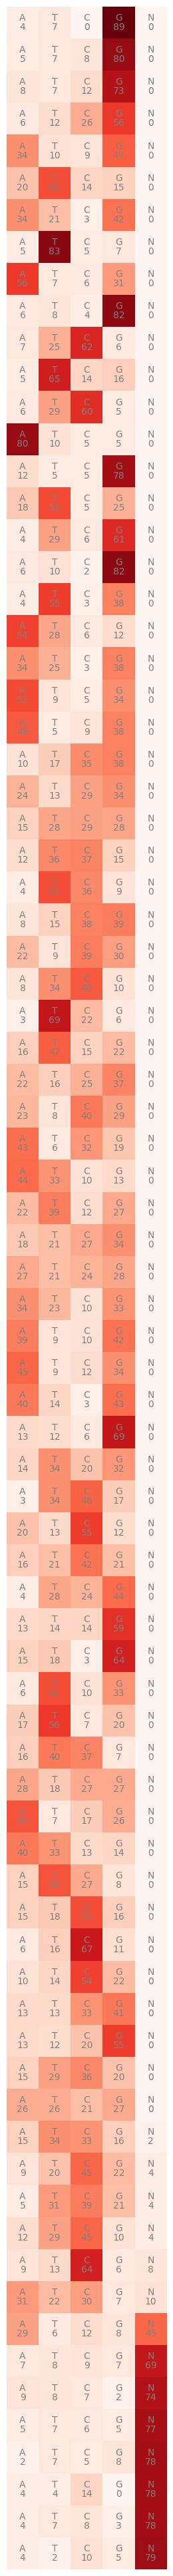

In [132]:
plt.figure(figsize = (50,50))
plt.imshow(N, cmap = 'Reds')
for i in range(5):
    for j in range(avg):
        plt.text(i, j, itos[i], ha = 'center', va = 'bottom', color = 'gray') #horizontal and vertical alognments
        plt.text(i, j, N[j, i].item(), ha = 'center', va = 'top', color = 'gray') # the count at the bottom
plt.axis('off');



In [133]:
P = (N+ 1).float() #N are the counts from the gra
P /= P.sum(1, keepdims = True) 

In [134]:
P

tensor([[0.0476, 0.0762, 0.0095, 0.8571, 0.0095],
        [0.0571, 0.0762, 0.0857, 0.7714, 0.0095],
        [0.0857, 0.0762, 0.1238, 0.7048, 0.0095],
        [0.0667, 0.1238, 0.2571, 0.5429, 0.0095],
        [0.3333, 0.1048, 0.0952, 0.4571, 0.0095],
        [0.2000, 0.4952, 0.1429, 0.1524, 0.0095],
        [0.3333, 0.2095, 0.0381, 0.4095, 0.0095],
        [0.0571, 0.8000, 0.0571, 0.0762, 0.0095],
        [0.5429, 0.0762, 0.0667, 0.3048, 0.0095],
        [0.0667, 0.0857, 0.0476, 0.7905, 0.0095],
        [0.0762, 0.2476, 0.6000, 0.0667, 0.0095],
        [0.0571, 0.6286, 0.1429, 0.1619, 0.0095],
        [0.0667, 0.2857, 0.5810, 0.0571, 0.0095],
        [0.7714, 0.1048, 0.0571, 0.0571, 0.0095],
        [0.1238, 0.0571, 0.0571, 0.7524, 0.0095],
        [0.1810, 0.5048, 0.0571, 0.2476, 0.0095],
        [0.0476, 0.2857, 0.0667, 0.5905, 0.0095],
        [0.0667, 0.1048, 0.0286, 0.7905, 0.0095],
        [0.0476, 0.5333, 0.0381, 0.3714, 0.0095],
        [0.5238, 0.2762, 0.0667, 0.1238, 0.0095],


In [135]:
P.shape

torch.Size([80, 5])